# Edmunds Sentiment Analysis

## Let's start by seeing what people think of Genesis

In [132]:
#Importing packages
import numpy as np
import pandas as pd
import datetime
import calendar
import string
from scipy import sparse
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import neighbors
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
    
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [133]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
#'genesis' will be the dataframe with all the reviews of Genesis vehicles on Edmunds
genesis = pd.read_csv("Scraped_Car_Review_genesis.csv")

In [4]:
# As a new car brand, there are only 78 reviews
genesis.info()
genesis.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
Unnamed: 0       78 non-null int64
Review_Date      78 non-null object
Author_Name      78 non-null object
Vehicle_Title    78 non-null object
Review_Title     78 non-null object
Review           78 non-null object
Rating           78 non-null int64
dtypes: int64(2), object(5)
memory usage: 4.4+ KB


,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 12/27/17 09:37 AM (PST),Mike,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,This car is the real deal,I have never posted an online review of a car...,5
1,1,on 12/02/17 06:18 AM (PST),Mark H,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,G90 - An S Class Competitor Selling For 35% Less,Be prepared to be amazed at what you get for ...,5
2,2,on 11/02/17 12:43 PM (PDT),LTHAtlanta,2017 Genesis G90 Sedan Premium 4dr Sedan (3.3L...,World class luxury at an excellent price,Genesis G90Took delivery of a Genesis G90 in ...,5
3,3,on 10/08/17 19:50 PM (PDT),Tod L.,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Amazing,This car is fantastic,5
4,4,on 10/02/17 08:36 AM (PDT),Barry B,2017 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Built to Compete,"The G90 Ultimate built to compete w/Audi A8L,...",5


## Preprocessing

In [5]:
genesis['Review'].replace('', np.nan, inplace=True)
genesis.dropna(subset=['Review'], inplace=True) #looks like no blank reviews
genesis.reset_index(inplace=True)
genesis.info()
genesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
index            78 non-null int64
Unnamed: 0       78 non-null int64
Review_Date      78 non-null object
Author_Name      78 non-null object
Vehicle_Title    78 non-null object
Review_Title     78 non-null object
Review           78 non-null object
Rating           78 non-null int64
dtypes: int64(3), object(5)
memory usage: 5.0+ KB


,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,0,on 12/27/17 09:37 AM (PST),Mike,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,This car is the real deal,I have never posted an online review of a car...,5
1,1,1,on 12/02/17 06:18 AM (PST),Mark H,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,G90 - An S Class Competitor Selling For 35% Less,Be prepared to be amazed at what you get for ...,5
2,2,2,on 11/02/17 12:43 PM (PDT),LTHAtlanta,2017 Genesis G90 Sedan Premium 4dr Sedan (3.3L...,World class luxury at an excellent price,Genesis G90Took delivery of a Genesis G90 in ...,5
3,3,3,on 10/08/17 19:50 PM (PDT),Tod L.,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Amazing,This car is fantastic,5
4,4,4,on 10/02/17 08:36 AM (PDT),Barry B,2017 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Built to Compete,"The G90 Ultimate built to compete w/Audi A8L,...",5
...,...,...,...,...,...,...,...,...
73,73,73,on 10/13/17 10:45 AM (PDT),no,2018 Genesis G80 Sedan 3.3T Sport 4dr Sedan (3...,no title,beware of tech. support,5
74,74,74,on 10/03/17 19:03 PM (PDT),JB,2018 Genesis G80 Sedan 3.8 4dr Sedan AWD (3.8L...,Great car!,only owned it for a month so far great car ex...,5
75,75,75,on 09/01/17 11:01 AM (PDT),George Lewin MD,2018 Genesis G80 Sedan 3.3T Sport 4dr Sedan (3...,My Best sport sedan Yet,"This is the best equipped, most fun and safes...",5
76,76,76,on 08/01/17 14:35 PM (PDT),Gerry Preston,2018 Genesis G80 Sedan 3.8 4dr Sedan (3.8L 6cy...,"Comfortable, Quiet Luxury Sedan",If you're looking for a comfortable and quiet...,5


In [6]:
genesis.isna().sum()

index            0
Unnamed: 0       0
Review_Date      0
Author_Name      0
Vehicle_Title    0
Review_Title     0
Review           0
Rating           0
dtype: int64

In [7]:
def text_process(reviewText): #should eliminate stopwords
    nopunc = [i for i in reviewText if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]

In [8]:
import nltk #the natural language processor!
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baronwilton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Developing Models

## Review Rating Prediction based on Review Text Content

In [9]:
# Benchmark model - multinomial logistic regression
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))
])
X1 = genesis['Review']
y1 = genesis['Rating']
review_train1, review_test1, label_train1, label_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)
pipeline.fit(review_train1, label_train1)
pip_pred1 = pipeline.predict(review_test1)
print(metrics.classification_report(label_test1,pip_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.83      1.00      0.91        20

    accuracy                           0.83        24
   macro avg       0.28      0.33      0.30        24
weighted avg       0.69      0.83      0.76        24



/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
#Print Cross Validation Score
scores = cross_val_score(pipeline, genesis['Review'], genesis['Rating'], cv=2)
print(scores.mean())

0.7953947368421053


In [11]:
# First model try - Naive bayes
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', MultinomialNB())
])
X2 = genesis['Review']
y2 = genesis['Rating']
review_train2, review_test2, label_train2, label_test2 = train_test_split(X2, y2, test_size=0.5)
pipeline.fit(review_train2, label_train2)
pip_pred2 = pipeline.predict(review_test2)
print(metrics.classification_report(label_test2, pip_pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.82      1.00      0.90        32

    accuracy                           0.82        39
   macro avg       0.21      0.25      0.23        39
weighted avg       0.67      0.82      0.74        39



/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
#Print Cross Validation Score
scores = cross_val_score(pipeline, genesis['Review'], genesis['Rating'], cv=2)
print(scores.mean())

0.7953947368421053


In [13]:
# DecisionTreeClassifier
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', DecisionTreeClassifier())
])
X3 = genesis['Review']
y3 = genesis['Rating']
review_train3, review_test3, label_train3, label_test3 = train_test_split(X3, y3, test_size=0.5)
pipeline.fit(review_train3, label_train3)
pip_pred3 = pipeline.predict(review_test3)
print(metrics.classification_report(label_test3, pip_pred3))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.25      0.20         4
           5       0.88      0.82      0.85        34

    accuracy                           0.74        39
   macro avg       0.35      0.36      0.35        39
weighted avg       0.78      0.74      0.76        39



In [14]:
#Print Cross Validation Score
scores = cross_val_score(pipeline, genesis['Review'], genesis['Rating'], cv=2)
print(scores.mean())

0.7184210526315788


In [15]:
# RandomForest
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', RandomForestClassifier())
])
X4 = genesis['Review']
y4 = genesis['Rating']
review_train4, review_test4, label_train4, label_test4 = train_test_split(X4, y4, test_size=0.5)
pipeline.fit(review_train4, label_train4)
pip_pred4 = pipeline.predict(review_test4)
print(metrics.classification_report(label_test4, pip_pred4))

/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.85      1.00      0.92        33

    accuracy                           0.85        39
   macro avg       0.21      0.25      0.23        39
weighted avg       0.72      0.85      0.78        39



/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
#Print Cross Validation Score
scores = cross_val_score(pipeline, genesis['Review'], genesis['Rating'], cv=2)
print(scores.mean())

0.7953947368421053


## Random Forest it is

In [17]:
genesis_rf = pd.DataFrame(data={'review_test': review_test4,
                                         'prediction': pip_pred4})
genesis_rf.reset_index(inplace=True)
genesis_rf
#empty cells are the predictions if no review is made in the testing set

,index,review_test,prediction
0,60,Overall great experience from purchase to fol...,5
1,70,I tried a lot of cars when the lease on my 20...,5
2,25,The G-80 is a fantastic car and competes well...,5
3,67,Be ready for a host of high tech safety and c...,5
4,2,Genesis G90Took delivery of a Genesis G90 in ...,5
5,16,"As previously written by another reviewer, ""a...",5
6,18,I found the conservative exterior design to b...,5
7,62,Great car. I only have it a few days.,5
8,66,Super car. Excellent suport from dealer and ...,5
9,63,I had a 2015 Genesis ( when it was still part...,5


In [18]:
genesis_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
index          39 non-null int64
review_test    39 non-null object
prediction     39 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.0+ KB


In [19]:
#Here is the dataframe with both the actual rating and the prediction
genesis_rf = pd.merge(genesis, genesis_rf, on = 'index')
genesis_rf

,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,review_test,prediction
0,2,2,on 11/02/17 12:43 PM (PDT),LTHAtlanta,2017 Genesis G90 Sedan Premium 4dr Sedan (3.3L...,World class luxury at an excellent price,Genesis G90Took delivery of a Genesis G90 in ...,5,Genesis G90Took delivery of a Genesis G90 in ...,5
1,4,4,on 10/02/17 08:36 AM (PDT),Barry B,2017 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Built to Compete,"The G90 Ultimate built to compete w/Audi A8L,...",5,"The G90 Ultimate built to compete w/Audi A8L,...",5
2,5,5,on 09/17/17 20:32 PM (PDT),tim mcc,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,dealership/repairs,my g90 has less than 200 miles in shop for tw...,1,my g90 has less than 200 miles in shop for tw...,5
3,6,6,on 09/05/17 10:25 AM (PDT),Nortic,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Best car I ever owned,Great value. Comes fully loaded. No options t...,5,Great value. Comes fully loaded. No options t...,5
4,8,8,on 08/13/17 11:15 AM (PDT),Jones123,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Test Driving Queen,The car has all the luxury that you expect fr...,5,The car has all the luxury that you expect fr...,5
5,9,9,on 08/03/17 12:28 PM (PDT),Rick,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,Traded my Lexus LS for a Genesis G90!,I've owned Lexus cars exclusively for the pas...,1,I've owned Lexus cars exclusively for the pas...,5
6,16,16,on 06/27/18 19:10 PM (PDT),Larry G.,2018 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Huge bang for the buck!,"As previously written by another reviewer, ""a...",5,"As previously written by another reviewer, ""a...",5
7,17,17,on 06/10/18 08:53 AM (PDT),George washington,2018 Genesis G90 Sedan Premium 4dr Sedan AWD (...,Great. Too complicated,Great car great value. A little too complicat...,5,Great car great value. A little too complicat...,5
8,18,18,on 06/02/18 17:41 PM (PDT),Randy Terry,2018 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Nearest Thing To A Cruise Ship?,I found the conservative exterior design to b...,4,I found the conservative exterior design to b...,5
9,19,19,on 05/26/18 11:32 AM (PDT),E Howard,2018 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,EHNewG90,This is a pricey car but having the car for a...,5,This is a pricey car but having the car for a...,5


## Review Rating Prediction based on User Similarity

### Preprocessing

In [20]:
genesis_df = genesis[['index', 'Vehicle_Title', 'Rating']].copy()
genesis_df['Rating'] = genesis_df['Rating'].apply(int)

# we need to convert the string names of reviewerID and asin to unique integers before we can generate a matrix

temp_df = pd.DataFrame(np.unique(genesis_df['index']), columns=['unique_ID'])
temp_df['unique_vehicle'] = pd.Series(np.unique(genesis_df['Vehicle_Title']))
temp_df['unique_ID_int'] = range(2000, 2078)
temp_df['unique_vehicle_int'] = range(0, 78)

genesis_df = pd.merge(genesis_df, temp_df.drop(['unique_vehicle', 'unique_vehicle_int'], axis=1),
                               left_on='index', right_on='unique_ID')
genesis_df = pd.merge(genesis_df, temp_df.drop(['unique_ID', 'unique_ID_int'], axis=1),
                               left_on='Vehicle_Title', right_on='unique_vehicle')

genesis_df['overall_rating'] = genesis_df['Rating']
id_asin_rating_df = genesis_df[['index', 'unique_ID_int', 'Rating']].copy()
genesis_df.drop(['Vehicle_Title', 'unique_vehicle', 'index', 'unique_ID', 'Rating'], axis=1, inplace=True)
id_asin_rating_df

,index,unique_ID_int,Rating
0,0,2000,5
1,1,2001,5
2,5,2005,1
3,9,2009,1
4,2,2002,5
...,...,...,...
73,67,2067,5
74,68,2068,5
75,69,2069,5
76,72,2072,5


## KNN

In [21]:
matrix = genesis_df.pivot(index='unique_ID_int', columns='unique_vehicle_int', values='overall_rating')
matrix = matrix.fillna(0)
user_item_matrix = sparse.csr_matrix(matrix.values)
matrix #The columns are the 16 vehicles Genesis sells (year+model+engine)

unique_vehicle_int,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
unique_ID_int,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
2075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
model_knn = neighbors.NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
model_knn.fit(user_item_matrix)
neighbors = np.asarray(model_knn.kneighbors(user_item_matrix, return_distance=False))
neighbors #each row is made up of 10 reviews (i.e., review #5, #1, #0, etc.) that are deemed similar by the KNN model

array([[ 5,  1,  0,  9, 54, 53, 51, 48, 55, 56],
       [ 5,  1,  0,  9, 54, 53, 51, 48, 55, 56],
       [ 2, 50, 48, 56, 55, 54, 53, 52, 51, 58],
       [ 7,  3,  8,  6, 55, 53, 54, 51, 56, 48],
       [11,  4, 10, 53, 51, 52, 55, 56, 54, 57],
       [ 5,  1,  0,  9, 54, 53, 51, 48, 55, 56],
       [ 7,  3,  8,  6, 55, 53, 54, 51, 56, 48],
       [ 7,  3,  8,  6, 55, 53, 54, 51, 56, 48],
       [ 7,  3,  8,  6, 55, 53, 54, 51, 56, 48],
       [ 5,  1,  0,  9, 54, 53, 51, 48, 55, 56],
       [11,  4, 10, 53, 51, 52, 55, 56, 54, 57],
       [11,  4, 10, 53, 51, 52, 55, 56, 54, 57],
       [23, 13, 16, 12, 19, 54, 58, 55, 56, 57],
       [23, 13, 16, 12, 19, 54, 58, 55, 56, 57],
       [17, 14, 52, 50, 57, 56, 55, 54, 53, 59],
       [15, 20, 21, 56, 58, 43, 54, 57, 59, 52],
       [23, 13, 16, 12, 19, 54, 58, 55, 56, 57],
       [17, 14, 52, 50, 57, 56, 55, 54, 53, 59],
       [22, 18, 24, 52, 57, 56, 55, 54, 53, 58],
       [23, 13, 16, 12, 19, 54, 58, 55, 56, 57],
       [15, 20, 21, 

In [23]:
unique_id = []
k_neigh = []
for i in range(78):
    unique_id.append(i + 2000)
    k_neigh.append(list(neighbors[i][1:10])) #Grabbing the ten closest neighbors

neighbors_df = pd.DataFrame(data={'unique_ID_int': unique_id,
                                  'k_neigh': k_neigh})

id_asin_rating_df = pd.merge(id_asin_rating_df, neighbors_df, on='unique_ID_int')
id_asin_rating_df['neigh_based_Rating'] = id_asin_rating_df['unique_ID_int']
id_asin_rating_df

,index,unique_ID_int,Rating,k_neigh,neigh_based_Rating
0,0,2000,5,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",2000
1,1,2001,5,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",2001
2,5,2005,1,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",2005
3,9,2009,1,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",2009
4,2,2002,5,"[50, 48, 56, 55, 54, 53, 52, 51, 58]",2002
...,...,...,...,...,...
73,67,2067,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",2067
74,68,2068,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",2068
75,69,2069,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",2069
76,72,2072,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",2072


In [24]:
# Calculating the mean score of the reviews that the reviewers in 'k_neigh' wrote
for index, row in id_asin_rating_df.iterrows():
    row = row['k_neigh']
    lista = []
    for i in row:
        p = id_asin_rating_df.loc[i]['Rating']
        lista.append(p)
    id_asin_rating_df.loc[index, 'neigh_based_Rating'] = np.nanmean(lista)
    
id_asin_rating_df

,index,unique_ID_int,Rating,k_neigh,neigh_based_Rating
0,0,2000,5,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",5.000000
1,1,2001,5,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",5.000000
2,5,2005,1,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",5.000000
3,9,2009,1,"[1, 0, 9, 54, 53, 51, 48, 55, 56]",5.000000
4,2,2002,5,"[50, 48, 56, 55, 54, 53, 52, 51, 58]",4.666667
...,...,...,...,...,...
73,67,2067,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",4.666667
74,68,2068,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",4.666667
75,69,2069,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",4.666667
76,72,2072,5,"[68, 59, 67, 69, 57, 76, 53, 52, 50]",4.666667


In [25]:
final_df = id_asin_rating_df[['index','unique_ID_int', 'Rating', 'neigh_based_Rating']]
final_df

,index,unique_ID_int,Rating,neigh_based_Rating
0,0,2000,5,5.000000
1,1,2001,5,5.000000
2,5,2005,1,5.000000
3,9,2009,1,5.000000
4,2,2002,5,4.666667
...,...,...,...,...
73,67,2067,5,4.666667
74,68,2068,5,4.666667
75,69,2069,5,4.666667
76,72,2072,5,4.666667


In [26]:
#The mean rating from the KNN model. Notice how the distribution of reviews will be left skewed
mean = final_df['neigh_based_Rating'].mean()
mean

4.6780626780626795

In [30]:
df = pd.merge(genesis_rf, final_df, on = 'index')
df

,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating_x,review_test,prediction,unique_ID_int,Rating_y,neigh_based_Rating
0,2,2,on 11/02/17 12:43 PM (PDT),LTHAtlanta,2017 Genesis G90 Sedan Premium 4dr Sedan (3.3L...,World class luxury at an excellent price,Genesis G90Took delivery of a Genesis G90 in ...,5,Genesis G90Took delivery of a Genesis G90 in ...,5,2002,5,4.666667
1,4,4,on 10/02/17 08:36 AM (PDT),Barry B,2017 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Built to Compete,"The G90 Ultimate built to compete w/Audi A8L,...",5,"The G90 Ultimate built to compete w/Audi A8L,...",5,2004,5,4.666667
2,5,5,on 09/17/17 20:32 PM (PDT),tim mcc,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,dealership/repairs,my g90 has less than 200 miles in shop for tw...,1,my g90 has less than 200 miles in shop for tw...,5,2005,1,5.000000
3,6,6,on 09/05/17 10:25 AM (PDT),Nortic,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Best car I ever owned,Great value. Comes fully loaded. No options t...,5,Great value. Comes fully loaded. No options t...,5,2006,5,4.555556
4,8,8,on 08/13/17 11:15 AM (PDT),Jones123,2017 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Test Driving Queen,The car has all the luxury that you expect fr...,5,The car has all the luxury that you expect fr...,5,2008,5,4.555556
5,9,9,on 08/03/17 12:28 PM (PDT),Rick,2017 Genesis G90 Sedan Premium 4dr Sedan AWD (...,Traded my Lexus LS for a Genesis G90!,I've owned Lexus cars exclusively for the pas...,1,I've owned Lexus cars exclusively for the pas...,5,2009,1,5.000000
6,16,16,on 06/27/18 19:10 PM (PDT),Larry G.,2018 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,Huge bang for the buck!,"As previously written by another reviewer, ""a...",5,"As previously written by another reviewer, ""a...",5,2016,5,3.444444
7,17,17,on 06/10/18 08:53 AM (PDT),George washington,2018 Genesis G90 Sedan Premium 4dr Sedan AWD (...,Great. Too complicated,Great car great value. A little too complicat...,5,Great car great value. A little too complicat...,5,2017,5,4.666667
8,18,18,on 06/02/18 17:41 PM (PDT),Randy Terry,2018 Genesis G90 Sedan Ultimate 4dr Sedan (5.0...,Nearest Thing To A Cruise Ship?,I found the conservative exterior design to b...,4,I found the conservative exterior design to b...,5,2018,4,4.333333
9,19,19,on 05/26/18 11:32 AM (PDT),E Howard,2018 Genesis G90 Sedan Ultimate 4dr Sedan AWD ...,EHNewG90,This is a pricey car but having the car for a...,5,This is a pricey car but having the car for a...,5,2019,5,3.444444


In [32]:
print('RMSE for neigh_based_Rating:', np.sqrt(mean_squared_error(final_df['Rating'], final_df['neigh_based_Rating'])))
print('RMSE for Random Forest:', np.sqrt(mean_squared_error(genesis_rf['Rating'], genesis_rf['prediction'])))
print('RMSE for the combination of the two methods:', np.sqrt(mean_squared_error(df['Rating_y'], df['prediction'])))
print('MAE for the combined prediction:', mean_absolute_error(df['Rating_y'], df['prediction']))

RMSE for neigh_based_Rating: 1.1562758000851765
RMSE for Random Forest: 1.0
RMSE for the combination of the two methods: 1.0
MAE for the combined prediction: 0.3333333333333333


## Some Extra Vizzies

In [33]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
print('Mean Rating:', genesis.Rating.mean())
print('SD of Ratings:', genesis.Rating.std())
print('Minimum Rating:',genesis.Rating.min())

Mean Rating: 4.5256410256410255
SD of Ratings: 1.1133704413149013
Minimum Rating: 1


/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


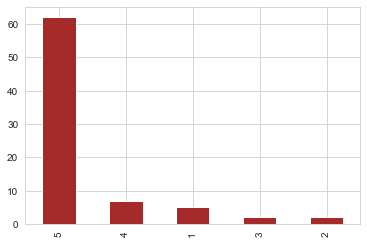

In [36]:
#Number of reviews for each rating
genesis.Rating.value_counts().plot(kind='bar', colors = "brown")

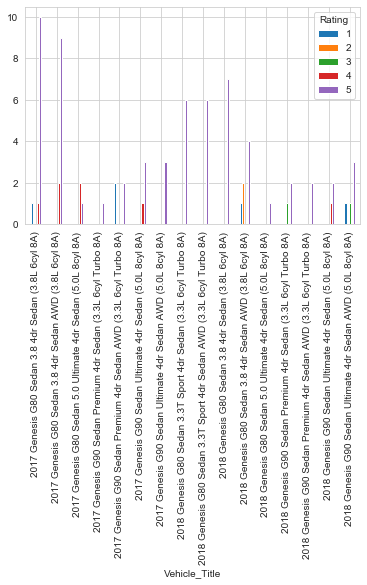

In [37]:
#Ratings for each vehicle
genesis_rating = genesis.groupby(['Vehicle_Title', 'Rating']).Rating.count().unstack()
genesis_rating.plot(kind='bar')

##  Okay, now let's see how this works for a more established brand... like Honda

In [105]:
#'honda' will be the dataframe with all the reviews of Genesis vehicles on Edmunds
honda = pd.read_csv(open('Scrapped_Car_Reviews_Honda.csv','rU'), encoding='utf-8', engine='c')
honda.info() #As an established brand, there are much more data to work with than for Genesis

/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14213 entries, 0 to 14212
Data columns (total 7 columns):
Unnamed: 0       14205 non-null object
Review_Date      12984 non-null object
Author_Name      12684 non-null object
Vehicle_Title    12684 non-null object
Review_Title     12683 non-null object
Review           12684 non-null object
Rating           12384 non-null float64
dtypes: float64(1), object(6)
memory usage: 777.4+ KB


In [88]:
honda.head()

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4.0
1,1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Go Anywhere with your Element,I have owned my Element since 2007 when I pur...,5.0
2,2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Such a cool car!,Lowest maintenance of any vehicle I've ever o...,1.0
3,3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),"From soup to nuts, it does it all.",The only thing I'd change is the drink holder...,5.0
4,4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),good value,I bought this vehicle new in 2007. got 97K mi...,4.0


In [48]:
print('Mean Rating:', honda.Rating.mean())
print('SD of Ratings:', honda.Rating.std())
print('Minimum Rating:',honda.Rating.min())

Mean Rating: 4.2886789405684755
SD of Ratings: 0.9166240184343659
Minimum Rating: 1.0


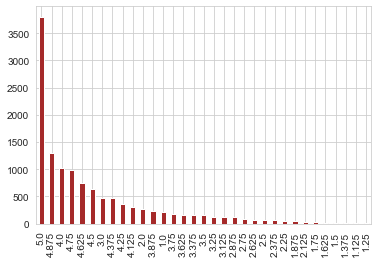

In [49]:
#Distribution of ratings
honda.Rating.value_counts().plot(kind='bar', colors = "brown")

## Preprocessing

In [106]:
honda['Review'].replace('', np.nan, inplace=True)
honda.dropna(subset=['Review'], inplace=True)
honda.dropna(subset=['Review_Title'], inplace=True)
honda.dropna(subset=['Rating'], inplace=True)
honda['Rating'] = honda['Rating'].astype(int)
honda.reset_index(inplace=True)
honda.info()
honda
#notice, now only 12,383 reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12383 entries, 0 to 12382
Data columns (total 8 columns):
index            12383 non-null int64
Unnamed: 0       12383 non-null object
Review_Date      12383 non-null object
Author_Name      12383 non-null object
Vehicle_Title    12383 non-null object
Review_Title     12383 non-null object
Review           12383 non-null object
Rating           12383 non-null int64
dtypes: int64(2), object(6)
memory usage: 774.1+ KB


,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,0,0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4
1,1,1,on 09/02/16 18:22 PM (PDT),Carol Shafford,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Go Anywhere with your Element,I have owned my Element since 2007 when I pur...,5
2,2,2,on 11/12/15 08:04 AM (PST),Gale,2007 Honda Element SUV EX 4dr SUV AWD (2.4L 4c...,Such a cool car!,Lowest maintenance of any vehicle I've ever o...,1
3,3,3,on 08/13/15 15:40 PM (PDT),Judy Eastham,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5M),"From soup to nuts, it does it all.",The only thing I'd change is the drink holder...,5
4,4,4,on 03/14/13 10:38 AM (PDT),boeserkritiker,2007 Honda Element SUV LX 4dr SUV (2.4L 4cyl 5A),good value,I bought this vehicle new in 2007. got 97K mi...,4
...,...,...,...,...,...,...,...,...
12378,14208,12679,on 01/17/16 08:39 AM (PST),Theresa L.,2016 Honda Fit Hatchback EX 4dr Hatchback (1.5...,2016 Honda Fit - a review from a single female.,Before purchasing this vehicle I had a Honda ...,5
12379,14209,12680,on 12/30/15 13:16 PM (PST),Coach Leathrum,2016 Honda Fit Hatchback EX 4dr Hatchback (1.5...,Love it!,I love my cute new car. I've only owed it fo...,5
12380,14210,12681,on 12/22/15 12:02 PM (PST),Wendy Adams,2016 Honda Fit Hatchback EX 4dr Hatchback (1.5...,A l,Nearly impossible to clean pet hairs from car...,5
12381,14211,12682,on 11/25/15 10:02 AM (PST),Randy Buss,2016 Honda Fit Hatchback EX 4dr Hatchback (1.5...,2016 Honda Fit EX,My review for the 2016 Honda Fit EX will be i...,5


In [107]:
honda.isna().sum()

index            0
Unnamed: 0       0
Review_Date      0
Author_Name      0
Vehicle_Title    0
Review_Title     0
Review           0
Rating           0
dtype: int64

In [91]:
def text_process(reviewText): #Elimates stopwords
    nopunc = [i for i in reviewText if i not in string.punctuation]
    nopunc_text = ''.join(nopunc)
    return [i for i in nopunc_text.split() if i.lower() not in stopwords.words('english')]

In [92]:
import nltk #the natural language processor
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baronwilton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Developing Models

In [108]:
# Benchmark model - multinomial logistic regression
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', LogisticRegression(solver='newton-cg', multi_class='multinomial'))
])
X1 = honda['Review']
y1 = honda['Rating']
review_train1, review_test1, label_train1, label_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)
pipeline.fit(review_train1, label_train1)
pip_pred1 = pipeline.predict(review_test1)
print(metrics.classification_report(label_test1,pip_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        87
           2       0.40      0.06      0.11       225
           3       0.38      0.24      0.29       496
           4       0.54      0.78      0.64      1761
           5       0.53      0.38      0.45      1146

    accuracy                           0.52      3715
   macro avg       0.37      0.29      0.30      3715
weighted avg       0.49      0.52      0.49      3715



/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
#Prints Cross Validation Score
scores = cross_val_score(pipeline, honda['Review'], honda['Rating'], cv=5)
print(scores.mean())  

0.513844078001391


In [111]:
# First model try - Naive bayes
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', MultinomialNB())
])
X2 = honda['Review']
y2 = honda['Rating']
review_train2, review_test2, label_train2, label_test2 = train_test_split(X2, y2, test_size=0.5)
pipeline.fit(review_train2, label_train2)
pip_pred2 = pipeline.predict(review_test2)
print(metrics.classification_report(label_test2, pip_pred2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       165
           2       0.00      0.00      0.00       363
           3       0.00      0.00      0.00       834
           4       0.48      1.00      0.65      2969
           5       0.66      0.01      0.03      1861

    accuracy                           0.48      6192
   macro avg       0.23      0.20      0.14      6192
weighted avg       0.43      0.48      0.32      6192



/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
#Prints Cross Validation Score
scores = cross_val_score(pipeline, honda['Review'], honda['Rating'], cv=5)
print(scores.mean())

0.472826242772378


In [113]:
# DecisionTreeClassifier
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', DecisionTreeClassifier())
])
X3 = honda['Review']
y3 = honda['Rating']
review_train3, review_test3, label_train3, label_test3 = train_test_split(X3, y3, test_size=0.5)
pipeline.fit(review_train3, label_train3)
pip_pred3 = pipeline.predict(review_test3)
print(metrics.classification_report(label_test3, pip_pred3))

              precision    recall  f1-score   support

           1       0.07      0.05      0.06       168
           2       0.17      0.12      0.14       385
           3       0.23      0.21      0.22       808
           4       0.51      0.54      0.53      2897
           5       0.41      0.43      0.42      1934

    accuracy                           0.42      6192
   macro avg       0.28      0.27      0.27      6192
weighted avg       0.41      0.42      0.42      6192



In [115]:
#Prints Cross Validation Score
scores = cross_val_score(pipeline, honda['Review'], honda['Rating'], cv=5)
print(scores.mean())

0.4276884338737503


In [116]:
# RandomForest
pipeline = Pipeline([
    ('Tf-Idf', TfidfVectorizer(ngram_range=(1,2), analyzer=text_process)),
    ('classifier', RandomForestClassifier())
])
X4 = honda['Review']
y4 = honda['Rating']
review_train4, review_test4, label_train4, label_test4 = train_test_split(X4, y4, test_size=0.5)
pipeline.fit(review_train4, label_train4)
pip_pred4 = pipeline.predict(review_test4)
print(metrics.classification_report(label_test4, pip_pred4))

/Users/baronwilton/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           1       0.20      0.01      0.02       177
           2       0.25      0.05      0.08       374
           3       0.29      0.09      0.14       833
           4       0.50      0.79      0.61      2894
           5       0.49      0.34      0.40      1914

    accuracy                           0.49      6192
   macro avg       0.35      0.26      0.25      6192
weighted avg       0.45      0.49      0.44      6192



In [117]:
#Prints Cross Validation Score
scores = cross_val_score(pipeline, honda['Review'], honda['Rating'], cv=5)
print(scores.mean())

0.4954390711508738


## Multinomial Logisitic Regression it is

In [118]:
honda_mlr = pd.DataFrame(data={'review_test': review_test1,
                                         'prediction': pip_pred1})
honda_mlr.reset_index(inplace=True)
honda_mlr
#empty cells are the predictions if no review is made in the test set..., 3715 reviews

,index,review_test,prediction
0,2816,I am a past owner of Honda vehicles including...,4
1,2212,"At 7,000-8,000 miles, the engine light came o...",4
2,2221,Upgraded to 2010 model after engine suddenly ...,4
3,9514,"Like so many others on this website, last mon...",4
4,12165,The Honda Fit is a great car when it comes to...,5
...,...,...,...
3710,4851,I love this car.,5
3711,4610,I was somewhat skeptical of stepping \ndown f...,4
3712,3005,I love my crv but I wish they had a better ...,4
3713,1638,"At 13,771,blue gray smoke coming from the exh...",3


In [119]:
honda_mlr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 3 columns):
index          3715 non-null int64
review_test    3715 non-null object
prediction     3715 non-null int64
dtypes: int64(2), object(1)
memory usage: 87.2+ KB


In [120]:
honda_mlr = pd.merge(honda, honda_mlr, on = 'index')
honda_mlr

,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,review_test,prediction
0,0,0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4,4 years with our element. Honestly there isn'...,4
1,7,7,on 09/12/10 00:00 AM (PDT),"""D""",2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),A great used car to buy,"I bought My 07 Honda Element. It has 63,000 m...",4,"I bought My 07 Honda Element. It has 63,000 m...",4
2,8,8,on 07/23/10 12:05 PM (PDT),jharris09,2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),One of my favorites!,The element lacks in features such as auto he...,4,The element lacks in features such as auto he...,4
3,16,16,on 06/17/09 11:05 AM (PDT),element10,2007 Honda Element SUV EX 4dr SUV (2.4L 4cyl 5A),Love my element,This is one incredible vehicle. Perfect for ...,4,This is one incredible vehicle. Perfect for ...,5
4,18,18,on 02/14/09 14:25 PM (PST),iPhoneholio,2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),Element SC - Too many problems,Cons: The Element is my first Honda and proba...,3,Cons: The Element is my first Honda and proba...,3
...,...,...,...,...,...,...,...,...,...,...
3160,12358,10833,on 04/02/10 10:00 AM (PDT),Patrick,2009 Honda Ridgeline Crew Cab RTS 4dr Crew Cab...,It's a Keeper,"Has all the things in need in a pickup, all I...",4,This is an update after owning the 2016 Fit f...,4
3161,12360,10835,on 02/20/10 14:01 PM (PST),moman,2009 Honda Ridgeline Crew Cab RTS 4dr Crew Cab...,Good Truck,This truck is a replacement for my 2007 Tundr...,4,Invest in the EX. Be prepared to consider get...,5
3162,12369,10844,on 08/21/09 21:42 PM (PDT),David,2009 Honda Ridgeline Crew Cab RTL 4dr Crew Cab...,Just the right size,Since 1985 I've owned an F-150 and four Silve...,4,This is the first time I have received wildly...,4
3163,12373,10848,on 07/15/09 08:08 AM (PDT),Real owner non troll,2009 Honda Ridgeline Crew Cab RT 4dr Crew Cab ...,Listen to real owners not to trolls,First and foremost let me reiterate that I'm ...,4,Safe and fun to drive with a deceptive amount...,5


## RRP based on User Similarity

### Preprocessing

In [140]:
honda_df = honda[['index', 'Vehicle_Title', 'Rating']].copy()
honda_df['Rating'] = honda_df['Rating'].apply(int)

# we need to convert the string names of reviewerID and asin to unique integers before we can generate a matrix

temp_df = pd.DataFrame(np.unique(honda_df['index']), columns=['unique_ID'])
temp_df['unique_vehicle'] = pd.Series(np.unique(honda_df['Vehicle_Title']))
temp_df['unique_ID_int'] = range(2000, 14383)
temp_df['unique_vehicle_int'] = range(0, 12383)

honda_df = pd.merge(honda_df, temp_df.drop(['unique_vehicle', 'unique_vehicle_int'], axis=1),
                               left_on='index', right_on='unique_ID')
honda_df = pd.merge(honda_df, temp_df.drop(['unique_ID', 'unique_ID_int'], axis=1),
                               left_on='Vehicle_Title', right_on='unique_vehicle')

honda_df['overall_rating'] = honda_df['Rating']
id_asin_rating_df = honda_df[['index', 'unique_ID_int', 'Rating']].copy()
honda_df.drop(['Vehicle_Title', 'unique_vehicle', 'index', 'unique_ID', 'Rating'], axis=1, inplace=True)
id_asin_rating_df

,index,unique_ID_int,Rating
0,0,2000,4
1,42,2042,4
2,48,2048,5
3,53,2053,3
4,1,2001,5
...,...,...,...
12378,14200,14370,5
12379,14202,14372,5
12380,14204,14374,3
12381,14173,14343,5


## KNN

In [141]:
matrix = honda_df.pivot(index='unique_ID_int', columns='unique_vehicle_int', values='overall_rating')
matrix = matrix.fillna(0)
user_item_matrix = sparse.csr_matrix(matrix.values)
matrix #there aare 1699 vehicles (year+model+engine)

unique_vehicle_int,0,1,2,3,4,5,6,7,8,9,...,1689,1690,1691,1692,1693,1694,1695,1696,1697,1698
unique_ID_int,,,,,,,,,,,,,,,,,,,,,
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
honda_model_knn = neighbors.NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
honda_model_knn.fit(user_item_matrix)
honda_neighbors = np.asarray(honda_model_knn.kneighbors(user_item_matrix, return_distance=False))
honda_neighbors

array([[   42,     0,    48, ...,  8261,  8257,  8253],
       [   47,    30,    31, ...,     1,  8271,  8256],
       [   28,    32,    57, ...,    38,    45,    20],
       ...,
       [12354, 12334, 12332, ..., 12352, 12336, 12349],
       [12354, 12334, 12332, ..., 12352, 12336, 12349],
       [12354, 12334, 12332, ..., 12352, 12336, 12349]])

In [143]:
unique_id = []
k_neigh = []
for i in range(12383):
    unique_id.append(i + 2000)
    k_neigh.append(list(honda_neighbors[i][1:10])) #Grabbing the ten closest neighbors

neighbors_df = pd.DataFrame(data={'unique_ID_int': unique_id,
                                  'k_neigh': k_neigh})

id_asin_rating_df = pd.merge(id_asin_rating_df, neighbors_df, on='unique_ID_int')
id_asin_rating_df['neigh_based_Rating'] = id_asin_rating_df['unique_ID_int']
id_asin_rating_df

,index,unique_ID_int,Rating,k_neigh,neigh_based_Rating
0,0,2000,4,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",2000
1,42,2042,4,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",2042
2,48,2048,5,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",2048
3,53,2053,3,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",2053
4,1,2001,5,"[30, 31, 33, 23, 29, 6, 1, 8271, 8256]",2001
...,...,...,...,...,...
12378,14200,14370,5,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",14370
12379,14202,14372,5,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",14372
12380,14204,14374,3,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",14374
12381,14173,14343,5,"[12343, 8255, 8257, 8256, 8259, 8254, 8251, 82...",14343


In [144]:
# Calculating the mean score of the reviews that the reviewers in 'k_neigh' wrote
for index, row in id_asin_rating_df.iterrows():
    row = row['k_neigh']
    lista = []
    for i in row:
        p = id_asin_rating_df.loc[i]['Rating']
        lista.append(p)
    id_asin_rating_df.loc[index, 'neigh_based_Rating'] = np.nanmean(lista)
    
id_asin_rating_df

,index,unique_ID_int,Rating,k_neigh,neigh_based_Rating
0,0,2000,4,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",4.222222
1,42,2042,4,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",4.222222
2,48,2048,5,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",4.222222
3,53,2053,3,"[0, 48, 53, 8255, 8259, 8258, 8261, 8257, 8253]",4.222222
4,1,2001,5,"[30, 31, 33, 23, 29, 6, 1, 8271, 8256]",4.333333
...,...,...,...,...,...
12378,14200,14370,5,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",4.888889
12379,14202,14372,5,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",4.888889
12380,14204,14374,3,"[12367, 12370, 12339, 12359, 12372, 12346, 825...",4.888889
12381,14173,14343,5,"[12343, 8255, 8257, 8256, 8259, 8254, 8251, 82...",4.333333


In [145]:
final_df = id_asin_rating_df[['index','unique_ID_int', 'Rating', 'neigh_based_Rating']]
final_df

,index,unique_ID_int,Rating,neigh_based_Rating
0,0,2000,4,4.222222
1,42,2042,4,4.222222
2,48,2048,5,4.222222
3,53,2053,3,4.222222
4,1,2001,5,4.333333
...,...,...,...,...
12378,14200,14370,5,4.888889
12379,14202,14372,5,4.888889
12380,14204,14374,3,4.888889
12381,14173,14343,5,4.333333


In [146]:
#Mean of the reviews based on the KNN model. Notice the distribution of reviews is left skewed.
mean = final_df['neigh_based_Rating'].mean()
mean

4.049404649743738

In [149]:
df = pd.merge(honda_mlr, final_df, on = 'index')
df

,index,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating_x,review_test,prediction,unique_ID_int,Rating_y,neigh_based_Rating
0,0,0,on 03/01/17 13:11 PM (PST),kris corah,2007 Honda Element SUV LX 4dr SUV AWD (2.4L 4c...,QUIRKY AND PRACTICAL,4 years with our element. Honestly there isn'...,4,4 years with our element. Honestly there isn'...,4,2000,4,4.222222
1,7,7,on 09/12/10 00:00 AM (PDT),"""D""",2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),A great used car to buy,"I bought My 07 Honda Element. It has 63,000 m...",4,"I bought My 07 Honda Element. It has 63,000 m...",4,2007,4,4.111111
2,8,8,on 07/23/10 12:05 PM (PDT),jharris09,2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),One of my favorites!,The element lacks in features such as auto he...,4,The element lacks in features such as auto he...,4,2008,4,4.111111
3,16,16,on 06/17/09 11:05 AM (PDT),element10,2007 Honda Element SUV EX 4dr SUV (2.4L 4cyl 5A),Love my element,This is one incredible vehicle. Perfect for ...,4,This is one incredible vehicle. Perfect for ...,5,2016,4,4.111111
4,18,18,on 02/14/09 14:25 PM (PST),iPhoneholio,2007 Honda Element SUV SC 4dr SUV (2.4L 4cyl 5A),Element SC - Too many problems,Cons: The Element is my first Honda and proba...,3,Cons: The Element is my first Honda and proba...,3,2018,3,4.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,12358,10833,on 04/02/10 10:00 AM (PDT),Patrick,2009 Honda Ridgeline Crew Cab RTS 4dr Crew Cab...,It's a Keeper,"Has all the things in need in a pickup, all I...",4,This is an update after owning the 2016 Fit f...,4,12535,4,3.444444
3161,12360,10835,on 02/20/10 14:01 PM (PST),moman,2009 Honda Ridgeline Crew Cab RTS 4dr Crew Cab...,Good Truck,This truck is a replacement for my 2007 Tundr...,4,Invest in the EX. Be prepared to consider get...,5,12537,4,3.444444
3162,12369,10844,on 08/21/09 21:42 PM (PDT),David,2009 Honda Ridgeline Crew Cab RTL 4dr Crew Cab...,Just the right size,Since 1985 I've owned an F-150 and four Silve...,4,This is the first time I have received wildly...,4,12546,4,4.444444
3163,12373,10848,on 07/15/09 08:08 AM (PDT),Real owner non troll,2009 Honda Ridgeline Crew Cab RT 4dr Crew Cab ...,Listen to real owners not to trolls,First and foremost let me reiterate that I'm ...,4,Safe and fun to drive with a deceptive amount...,5,12550,4,4.111111


In [150]:
print('RMSE for neigh_based_Rating:', np.sqrt(mean_squared_error(final_df['Rating'], final_df['neigh_based_Rating'])))
print('RMSE for Random Forest:', np.sqrt(mean_squared_error(honda_mlr['Rating'], honda_mlr['prediction'])))
print('RMSE for the combination of the two methods:', np.sqrt(mean_squared_error(df['Rating_y'], df['prediction'])))
print('MAE for the combined prediction:', mean_absolute_error(df['Rating_y'], df['prediction']))

RMSE for neigh_based_Rating: 0.9789010259765779
RMSE for Random Forest: 1.1084908545962564
RMSE for the combination of the two methods: 1.1084908545962564
MAE for the combined prediction: 0.7579778830963665
